#### Chapter 4b
### Analyzing Neural Time Series Data
Python code for Chapter 4 script B -- converted from original Matlab by AE Studio (and ChatGPT)\
Original Matlab code by Mike X Cohen

This code accompanies the book, titled "Analyzing Neural Time Series Data" (MIT Press).\
Using the code without following the book may lead to confusion, incorrect data analyses, and misinterpretations of results.\
Mike X Cohen and AE Studio assume no responsibility for inappropriate or incorrect use of this code.

### Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image

### Basic plotting

A library called matplotlib is often used for plotting.
Note that the plots may function slightly differently in a Python script as compared to in IPython.

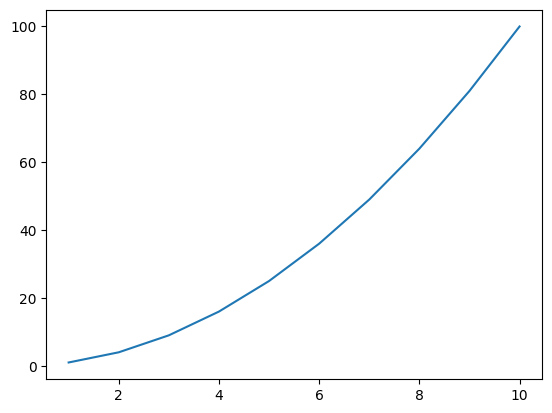

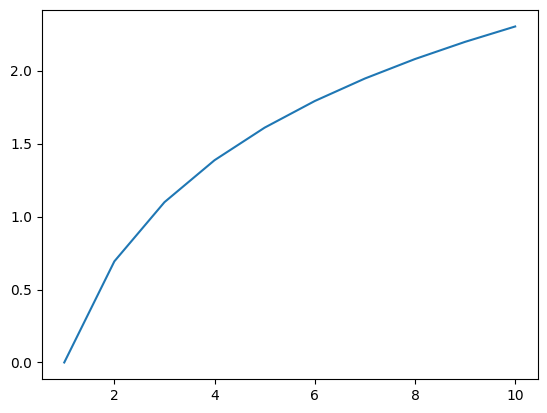

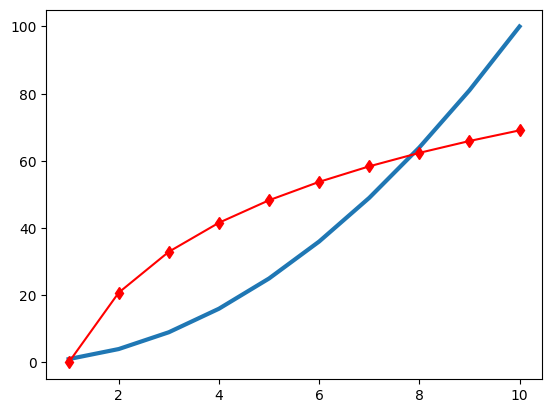

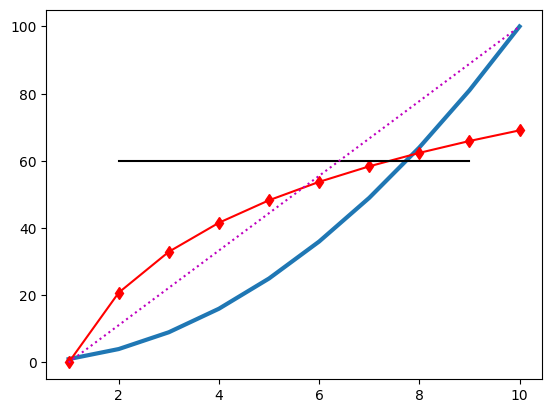

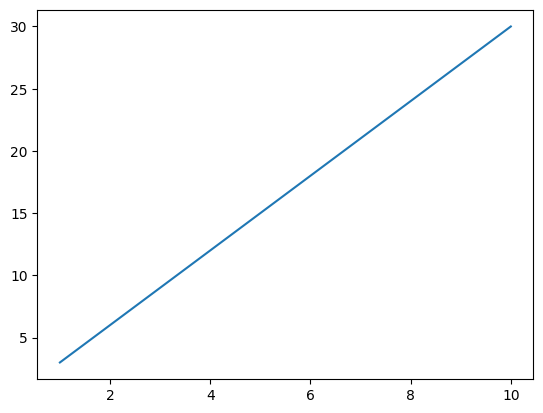

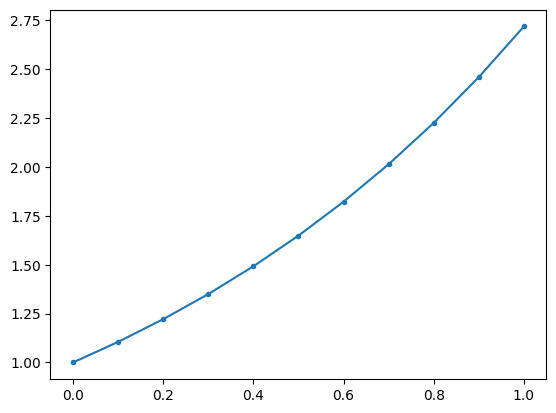

x and y must have same first dimension, but have shapes (11,) and (12,)


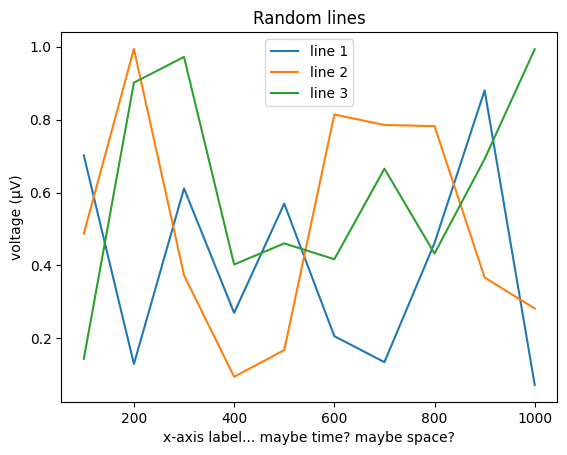

In [ ]:
# Open a new figure and plot X by Y
plt.figure()
plt.plot(range(1, 11), np.power(range(1, 11), 2))
plt.show()

# Plots do not overwrite previous plots in IPython
plt.plot(range(1, 11), np.log(range(1, 11)))
plt.show()

# Multiple plots in the same figure
plt.plot(range(1, 11), np.power(range(1, 11), 2), linewidth=3)
plt.plot(range(1, 11), np.log(range(1, 11)) * 30, 'r-d')
plt.show()

# Drawing lines
plt.plot(range(1, 11), np.power(range(1, 11), 2), linewidth=3)
plt.plot(range(1, 11), np.log(range(1, 11)) * 30, 'r-d')
# Note that we have to plot the curves again unlike with MATLAB's `hold on`
plt.plot([2, 9], [60, 60], 'k')
plt.plot([1, 10], [0, 100], 'm:')
plt.show()

# Plot something else
plt.plot(range(1, 11), np.multiply(range(1, 11), 3))
plt.show()

# Plot information in variables
x = np.arange(0, 1.1, 0.1)
y = np.exp(x)
plt.plot(x, y, '.-')
plt.show()

# x and y need to be of equal length
x = np.arange(0, 1.1, 0.1)
y = np.array([0] + list(np.exp(x)))
try:
    plt.plot(x, y, '.-')
    plt.show()
except ValueError as e:
    print(e)

# Plot multiple lines simultaneously
plt.plot(range(100, 1001, 100), # You can add a break to continue the code on the next line. This is convenient for long lines of code that you want to be visible on a single screen without using the horizontal scrollbar.
         np.random.rand(10, 3))
plt.title('Random lines')
plt.xlabel('x-axis label... maybe time? maybe space?')
plt.ylabel('voltage (μV)')
plt.legend(['line 1', 'line 2', 'line 3'])
plt.show()

### Plotting lines in 3D space

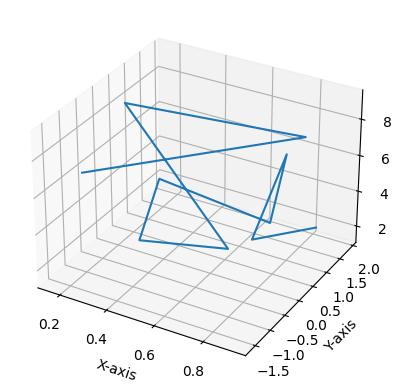

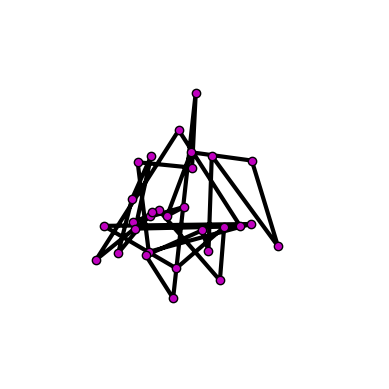

In [ ]:
# Define data in 3 dimensions
n = 10
dataX = np.random.rand(n)
dataY = np.random.randn(n)
dataZ = np.random.rand(n) * 10

# Plot a line in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(dataX, dataY, dataZ)
ax.grid(True)

# Adding other features to the plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

# Plotting a 3D matrix
data3d = np.random.randn(3, 30)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(data3d[0, :], data3d[1, :], data3d[2, :], 'ko-', linewidth=3, markerfacecolor='m')
ax.axis('off')
ax.axis('square')
plt.show()

### Slightly more advanced: get and set

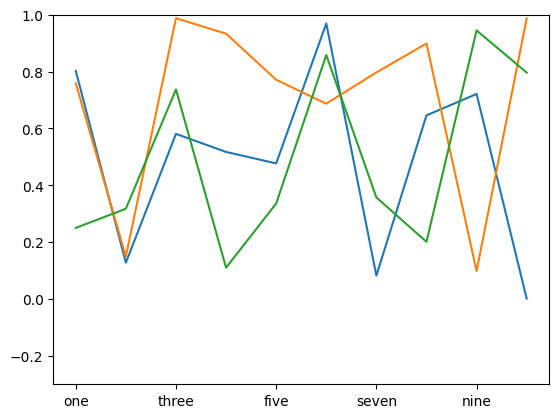

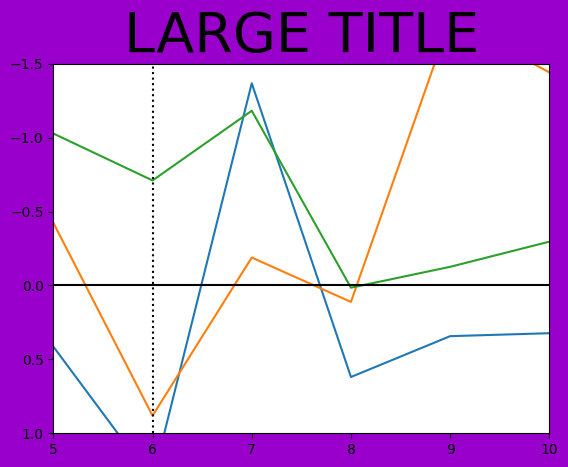

In [ ]:
# Plot and modify axis properties
plt.plot(range(1, 11), np.random.rand(10, 3))
ax = plt.gca()
ax.set_xticks(range(1, 10, 2))
ax.set_xticklabels(['one', 'three', 'five', 'seven', 'nine'])

# Get axis properties
axis_ylim = ax.get_ylim()

# Assign axis properties using variables
the_ylim_i_want = [-0.3, -np.cos(np.pi)]
ax.set_ylim(the_ylim_i_want)
plt.show()

# Change properties of figures
plt.plot(range(1, 11), np.random.randn(10, 3))
fig = plt.gcf() # Get current figure
ax = plt.gca() # Get current axis
ax.set_ylim([1, -1.5])
ax.set_xlim([5, 10])
fig.patch.set_facecolor((0.6, 0, 0.8))
plt.title('Hello there')
titleh = ax.title
titleh.set_fontsize(40)
titleh.set_text('LARGE TITLE')

# Draw lines showing the 0 crossings
plt.plot(ax.get_xlim(), [0, 0], 'k')
plt.plot([6, 6], ax.get_ylim(), 'k:')
plt.show()

### Subplots

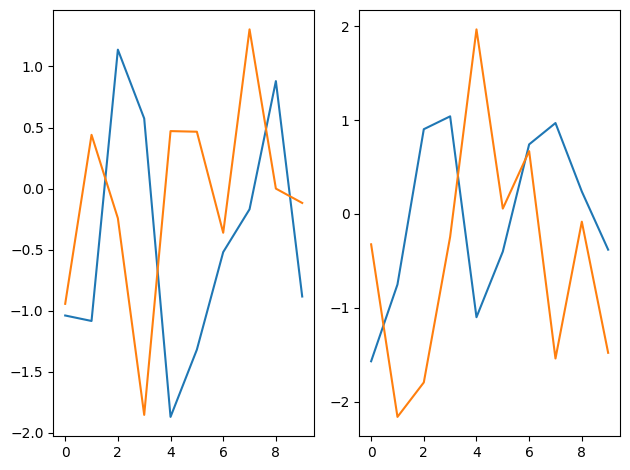

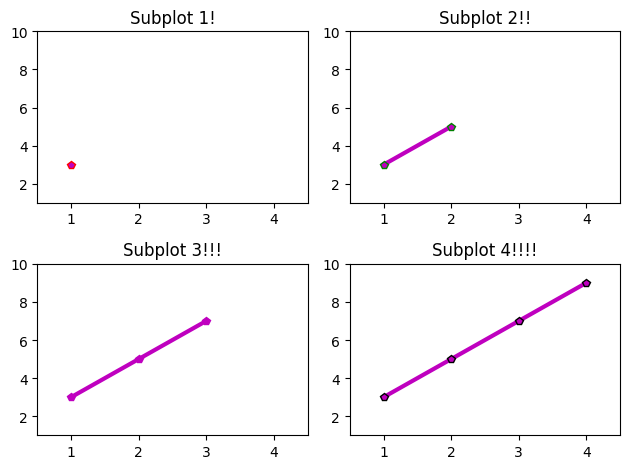

In [ ]:
# Use multiple plots in a figure
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(np.random.randn(10, 2))
plt.subplot(1, 2, 2)
plt.plot(np.random.randn(10, 2))
plt.tight_layout()
plt.show()

# More subplots with different features
edgecolors = ['r', 'g', 'm', 'k']
plt.clf()
for subploti in range(1, 5):
    plt.subplot(2, 2, subploti)
    plt.plot(range(1, subploti + 1), np.multiply(range(1, subploti + 1), 2) + 1, 'm-p', linewidth=3, markeredgecolor=edgecolors[subploti - 1])
    ax = plt.gca()
    ax.set_xlim([0.5, 4.5])
    ax.set_ylim([1, 10])
    plt.title('Subplot {}{}'.format(subploti, '!' * subploti))
plt.tight_layout()
plt.show()

### Basic image plotting

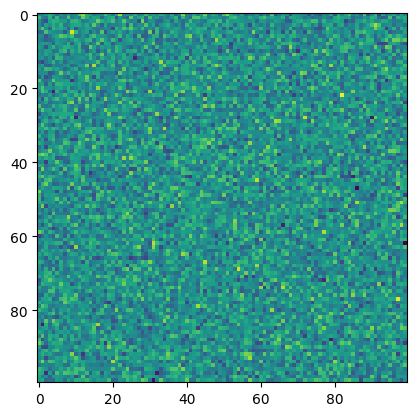

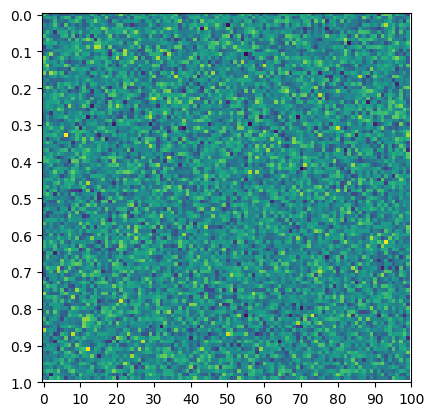

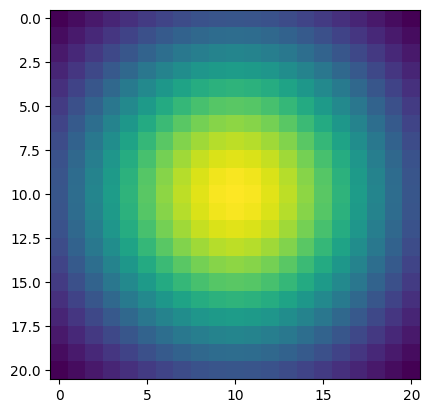

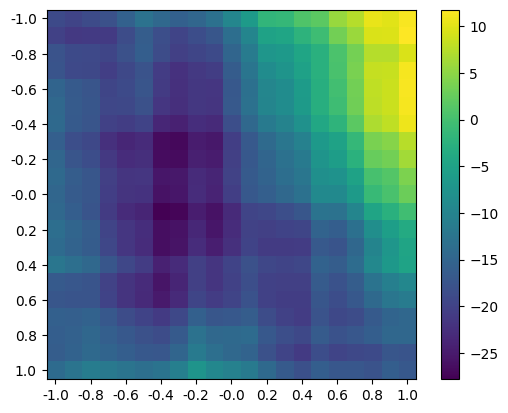

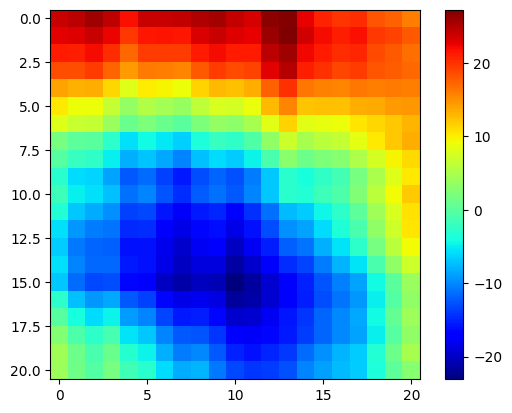

<Figure size 640x480 with 0 Axes>

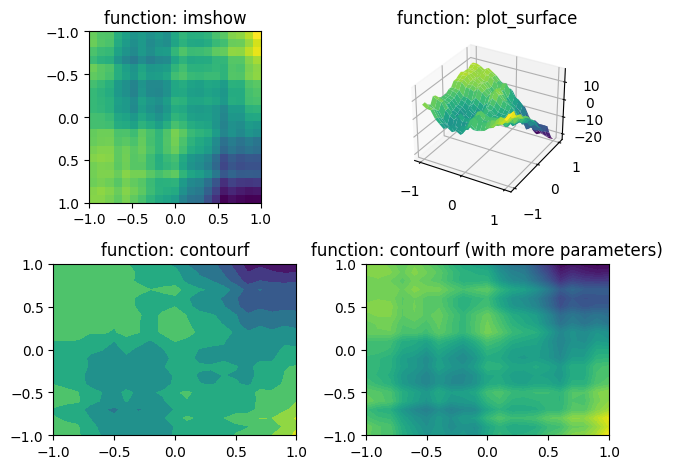

In [ ]:
# Plot images in 2D
plt.figure()
plt.imshow(np.random.randn(100, 100))
plt.show()

# Imagesc with x, y, z inputs
plt.imshow(np.random.randn(100, 100))
plt.yticks(np.arange(0, 110, 10), np.round(np.arange(0, 1.1, 0.1), 1))
plt.xticks(np.arange(0, 110, 10))
plt.show()

# Make the plot smoother with a 2D Gaussian convolution
xyrange = np.arange(-1, 1.1, 0.1)
X, Y = np.meshgrid(xyrange, xyrange)
gaus2d = np.exp(-(X**2 + Y**2))

# Look at the Gaussian
plt.imshow(gaus2d)
plt.show()

# Convolve and plot
plt.imshow(convolve2d(gaus2d, np.random.randn(100, 100), mode='same'))
plt.yticks(np.arange(0, 22, 2), np.round(np.arange(-1, 1.1, 0.2), 1))
plt.xticks(np.arange(0, 22, 2), np.round(np.arange(-1, 1.1, 0.2), 1))
plt.colorbar()
plt.show()

# Change the colormap
plt.imshow(convolve2d(gaus2d, np.random.randn(100, 100), mode='same'))
plt.colorbar()
plt.set_cmap('jet')
plt.show()

# Following plots will continue to use the 'jet' colormap unless we change it back to the default
plt.set_cmap('viridis')

# There are other functions you can use for 2D data, including:
plt.figure()
data = convolve2d(gaus2d, np.random.randn(100, 100), mode='same')
plt.subplot(221)
plt.imshow(data, extent=(xyrange[0], xyrange[-1], xyrange[-1], xyrange[0]))
plt.title('function: imshow')

plt.subplot(222, projection='3d')
X, Y = np.meshgrid(xyrange, xyrange)
plt.gca().plot_surface(X, Y, data, cmap='viridis', edgecolor='none')
plt.title('function: plot_surface')

plt.subplot(223)
plt.contourf(X, Y, data, cmap='viridis')
plt.title('function: contourf')

plt.subplot(224)
plt.contourf(X, Y, data, 40, cmap='viridis')
plt.gca().set_facecolor('none')  # Equivalent to 'linecolor','none' in MATLAB
plt.title('function: contourf (with more parameters)')

plt.tight_layout()
plt.show()

### A bit more about images

(734, 700, 3)


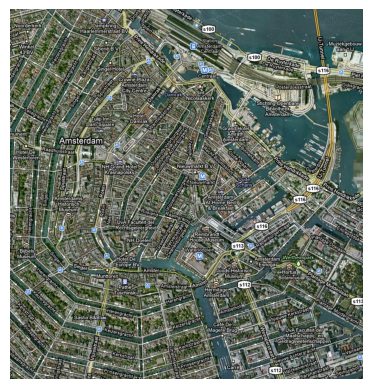

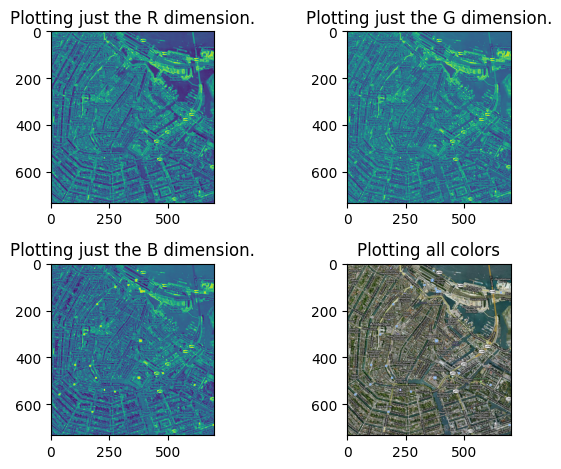

In [ ]:
# Load an image
amsterdam = Image.open('../data/amsterdam.bmp')
print(np.shape(amsterdam))

# Display the image
plt.figure()
plt.imshow(amsterdam)
plt.axis('image')
plt.axis('off')
plt.set_cmap('viridis')
plt.show()

# Plot the individual color components
title_color_components = 'RGB'
for subploti in range(1, 5):
    plt.subplot(2, 2, subploti)
    if subploti < 4:
        plt.imshow(np.array(amsterdam)[:, :, subploti - 1])
        plt.title('Plotting just the {} dimension.'.format(title_color_components[subploti - 1]))
    else:
        plt.imshow(amsterdam)
        plt.title('Plotting all colors')
plt.tight_layout()
plt.show()